In [ ]:
import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
a = 0
b = 1
u_x_1_0 = lambda x: x * x # левая граница
u_x_1_1 = lambda x: 1 + x * x # правая граница
u_x_2_0 = lambda x: x * x # нижняя граница
u_x_2_1 = lambda x: 1 + x * x # верхняя граница
L = 20
h = 1 / L
f = 4

In [ ]:
size = (L+1)**2
A = np.eye(size)
u = np.zeros(size)
for i in range(L+1):
    u[i] = u_x_1_0(i*h) # левая граница
for i in range(size-L-1, size):
    u[i] = u_x_1_1((i-(size-L-1))*h) # правая граница
for i in range(0, size, L + 1):
    u[i] = u_x_2_0(i * h / (L+1)) # нижняя граница
for i in range(L, size, L + 1):
    u[i] = u_x_2_1((i-L) * h / (L+1)) # верхняя граница

In [ ]:
delta = 1 / (h**2)
inside = []
for i in range(L+2, size):
    if ((((i+1)%(L+1)) != 0) and ((i%(L+1)) != 0) and (i < (size - L))):
        inside.append(i)
for i in inside:
    A[i][i] = -4 * delta
    A[i][i+1] = delta
    A[i][i-1] = delta
    A[i][i-L-1] = delta
    A[i][i+L+1] = delta
    u[i] = f

In [ ]:
def seidel(A, b, eps):
    n = len(A)
    x = [.0 for i in range(n)]

    converge = False
    while not converge:
        x_new = np.copy(x)
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]

        converge = np.sqrt(sum((x_new[i] - x[i]) ** 2 for i in range(n))) <= eps
        x = x_new

    return x

In [ ]:
y = seidel(A, u, 0.05)

In [ ]:
x1 = np.arange(a, b + h, h)
x2 = np.arange(a, b + h, h)
x1_grid, x2_grid = np.meshgrid(x1, x2) # сетка

u_true = lambda x1, x2: x1**2 + x2**2

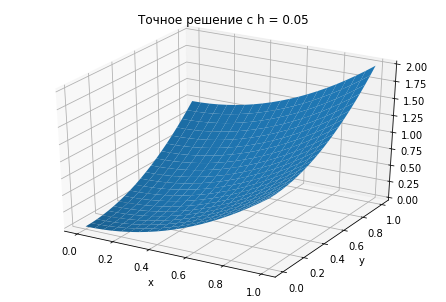

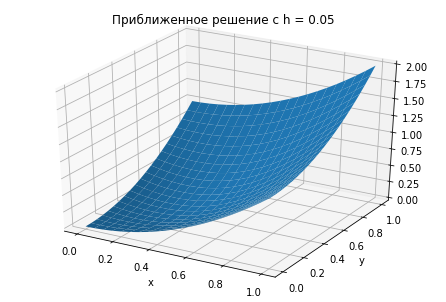

In [ ]:
fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(x1_grid, x2_grid, u_true(x1_grid, x2_grid))
pylab.xlabel("x")
pylab.ylabel("y")
title = "Точное решение с h = " + str(h)
pylab.title(title)
pylab.show()

fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(x1_grid, x2_grid, y.reshape(L+1, L+1))
pylab.xlabel("x")
pylab.ylabel("y")
title = "Приближенное решение с h = " + str(h)
pylab.title(title)
pylab.show()